Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [28]:
os.getcwd()
os.chdir("C:\\Users\\Damla\\Desktop\\math388\\homeworks")

In [29]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')


## Task 1

Run the code below before you start working on your homework:


In [30]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode()).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [31]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode()).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [32]:
task2_data = pd.read_csv("../data/hw3-task2-data.csv")
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [33]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:1], task2_data.iloc[:,2], test_size=0.25)

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [162]:
model = KMeans(n_clusters=2).fit(Xtest)
model.fit(Xtest)
predictions = model.predict(Xtest) 

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [36]:
cm = confusion_matrix(Ytest,predictions)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Ytest,predictions) 
print(confusion_matrix(Ytest,predictions))
accuracy

[[65 61]
 [59 53]]


0.4957983193277311

As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

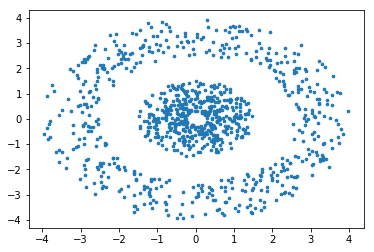

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f1 = task2_data['x'].values
f2 = task2_data['y'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2, s=7)


In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

Looking at this image, we can immediately recognize two natural groups of points. So how k-means does is dividing half of it as 2 cluster, instead of taking small spehere and bigger circle as clusters. K-means is trying to fit a square peg in a round hole- trying to find nice centers with neat spheres around them- and it failed. Yes, it’s still minimizing the within-cluster sum of squares.

In k-means algorithm, first step is determination of centering centers. Second step is clustering of the outside data according to their distance. Third step is dentifying new centers according to the clustering (or shifting the old centers to the new center) and repeat steps 2 and 3 until stable state is reached. So in this case the centers are same that's why it can not distinguish the clusters.

## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [134]:
model = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)

Now, construct the confusion matrix, and calculate your accuracy.

In [135]:
cm = confusion_matrix(Ytest,predictions)
accuracy = accuracy_score(Ytest,predictions)
accuracy

0.6296296296296297

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

A positive integer k is specified, along with a new sample and then we select the k entries in our database which are closest to the new sample to find the most common classification of these entries. In this example when you choose a point from data set it is obivous that it is whether close to the circle in outside or close to the sphere inside. So k-nn algorithm can work better in this data set as it tries to find the k nearest neighbor and do a majority voting.

## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [136]:
data = pd.read_excel("../data/BreastTissue.xlsx")
data.head(10)


,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,car,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,car,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,car,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,car,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,car,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [137]:
xs = data.iloc[:,1:]
ys = data.iloc[:,0]


In [138]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.33) #0.25 dene

In [139]:
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(Xtrain, Ytrain)
predicted =  model.predict(Xtest)


In [147]:
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[5 0 0 0 0 1]
 [0 5 0 0 0 2]
 [2 1 1 0 0 0]
 [0 3 0 0 2 1]
 [0 0 0 1 3 2]
 [0 2 0 1 1 2]]
0.45714285714285713


Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [148]:
scaler = StandardScaler()
scaler.fit(xs)
xs= scaler.transform(xs)


Now, repeat mdoel construction, training, testing and accuracy calculation

In [149]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.33)
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(Xtrain, Ytrain)
predicted =  model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[8 0 1 0 0 0]
 [0 6 0 0 0 1]
 [0 0 4 1 0 0]
 [0 1 0 3 0 0]
 [0 0 0 0 5 0]
 [0 0 0 3 1 1]]
0.7714285714285715


Why did we get better results? Explain below:

### Your explanation goes below

The features are not at all on the same scale(As an example compare DA and HFS, we can see they are comparable).First, the fit_transform() function will create a copy of the dataset, this is because the ‘copy’ parameter defaults to True. Then, the data is centered before scaling, this is because the parameter ‘with_mean’ is set to True by default. After this, because the parameter ‘with_std’ defaults to True, the data is scaled either with unit variance or unit standard deviation. And in the end we have normalized xs columns.

## Task 5

Now, construct a k-nn model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [150]:
data = pd.read_excel("../data/BreastTissue.xlsx")

In [151]:
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

In [159]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.33)

In [160]:
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtest= scaler.transform(Xtest)
Xtrain=scaler.transform(Xtrain)

model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(Xtrain, Ytrain)

predicted =  model.predict(Xtest)


In [161]:
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[5 0 1 0 0 0]
 [0 9 0 0 0 1]
 [1 0 5 0 0 0]
 [0 1 0 3 0 0]
 [0 0 0 0 4 0]
 [0 0 0 2 0 3]]
0.8285714285714286


Explanation: 

StandardScaler transforms the data such that its distribution will have a standard normal distribution with a mean of zero and a standard deviation of one. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset. Height and weight can not be compared but if we normalize them we will be able to have some idea. Basically, it helps us, for caring different features fairly without caring the scale. That's why our last model with feature scaling has the better accuracy.
In the previous task, we normalized the feature columns xs and that helped also to increase the accurany but normalizing XTrain and Xtest helps more as it changes all features to be between 0 and 1. 
And in the first one, without any feature scaling it is like comparing "cm" and "kg" that's why our accurany was the least as 0.45. We had to normalize the data to classify them fairly.